In [1]:
from qiskit import *

### Teleportacja kwantowa

W tym notatniku przedstawiony zostanie protokół teleportacji kwantowej. Jest to protokół, który umożliwia przeniesienie stanu kwantowego z jednego kubitu na inny. Należy podkreślić, że teleportacja kwantowa nie łamie zakazu klonowania (ang. *no-cloning theorem*), ponieważ informacja kwantowa w tym protokole nie jest kopiowana, a jedynie przenoszona na inny kubit (zostaje zniszczona na początkowym kubicie).  

### Implementacja

Wyobraźmy sobie, że Alicja i Bob chcą przeprowadzić protokół teleportacji i przeteleportować stan $\vert\psi\rangle=\vert 1 \rangle$ od Alicji do Boba. Zakładamy, że Alicja i Bob mają do dyspozycji parę splątanych cząstek w stanie Bella, których mogą użyć, aby przeprowadzić teleportację.  


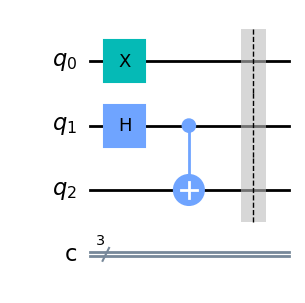

In [2]:
# Inicjalizujemy układ złożony z trzech kubitów:
# q0 - kubit Alicji w stanie |psi>, który chcemy przeteleportować
# q1 - drugi kubit Alicji, będzie to jeden z pary dwóch splątanych fotonów
# q2 - kubit Boba, zostani on splątany z kubitem q1, 
#     (cel teleportacji, docelowo po całym protokole ma się znaleźć w stanie |psi>) 

circuit = QuantumCircuit(3,3)

# Następnie przygotowujemy kubit Alicji w stanie, który chcemy przetelportować (|1>)
circuit.x(0)

# Tworzymy splątanie między cząstkami q1 oraz q2
circuit.h(1)
circuit.cx(1,2)

circuit.barrier()

# Tak wygląda układ przygotowany do przeprowadzenia teleportacji
circuit.draw(output="mpl")

Następnie Alicja wykonuje serię operacji na swoich kubitach, a potem wykonuje pomiar obu kubitów.

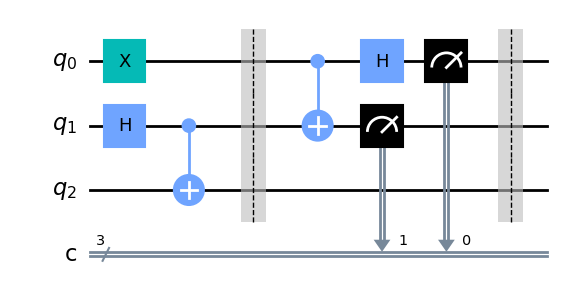

In [3]:
# Alicja działa bramką CNOT oraz bramką Hadamarda.
circuit.cx(0,1)
circuit.h(0)

# Następnie Alicja mierzy oba kubity i zapisuje wyniki w klasycznych bitach 0 oraz 1
circuit.measure([0, 1], [0, 1])

circuit.barrier()
circuit.draw(output="mpl")

Alicja przekazuje Bobowi wyniki pomiarów klasycznym kanałem komunikacji. Zależnie od otrzymanej informacji, Bob aplikuje odpowiednie bramki kwantowe na swoim kubicie, aby ostatecznie otrzymać w wyniku stan $\vert\psi\rangle$ .

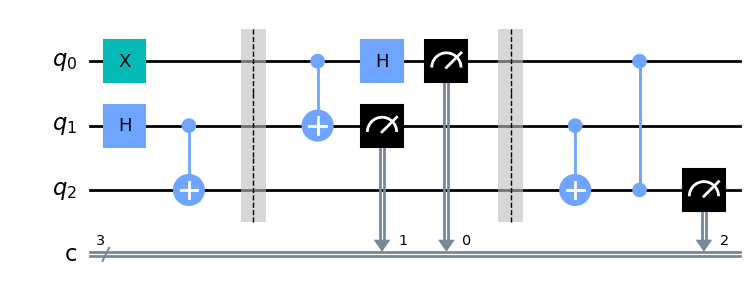

In [4]:
# Bob wykonuje odpowiednie operacje (odpowiednie bramki), znając wyniki pomiarów Alicji.

# Teoretycznie powinno być tak:
# circuit.measure([0, 1], [0, 1])
# circuit.x(2).c_if(cr2, 1)
# circuit.z(2).c_if(cr1, 1)

# Jednak u Alicji kubity po pomiarze już przeszły w ustalony stan, 
# więc można wykorzystać operacje czysto kwantowe.
# Użycie bramek "controlled" pełni funkcję operacji IF
# IF bit1 == 1 -> bramka X w działaniu na kubit 2
# IF bit2 == 1 -> bramka Z w działaniu na kubit 2

circuit.cx(1, 2)
circuit.cz(0, 2)

# Ostatecznie mierzymy kubit Boba, aby sprawdzić czy teleportacja powiodła się.
circuit.measure([2], [2])

# Oto cały obwód służący do teleportacji
circuit.draw(output='mpl')

### Przeprowadzenie symulacji

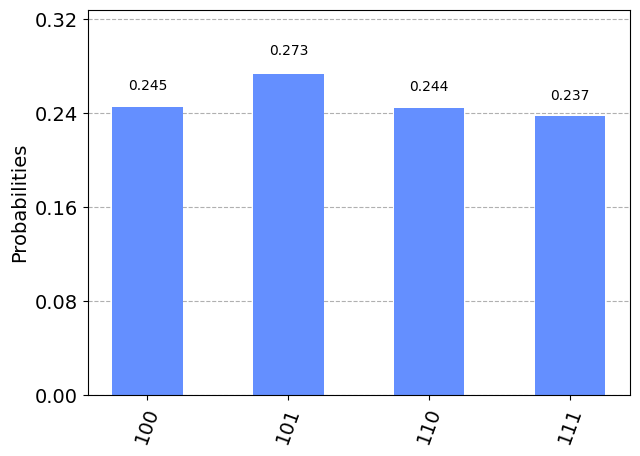

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Uwaga (przypomnienie) - kolejność kubitów w etykietkach jest od prawej do lewej (najbardziej po prawej jest stan kubitu |0>), odwrotnie niż zapisujemy wewnątrz ketów!  
Jak widać, stan kubitu $2$ (pierwsza cyfra etykiety) jest zawsze równy 1, z racji że teleportowaliśmy stan $\vert1\rangle$ na kubit 2.

### Wersja Qiskit

In [6]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.21.2', 'qiskit-aer': '0.11.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.38.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}